In [ ]:
#Kayla API LOOP
#counter = 0
#cities = []
#results=[]

    

#For loop
#for city,item in city_df.iterrows():
    #counter=counter+1  
    #print(item)
    #try:
        #url = "https://hotels-com-free.p.rapidapi.com/srle/listing/v1/brands/hotels.com"
        #print(item["Lat"],item["Lng"]) 
        #querystring = {"lat":item["Lat"],"lon":item["Lng"],"checkIn":"2021-03-15","checkOut":"2021-03-19","rooms":"2","locale":"en_US","currency":"USD","pageNumber":"1"}

        #headers = {
        #'x-rapidapi-key': h_key,
        #'x-rapidapi-host': "hotels-com-free.p.rapidapi.com"
        #}

        #response = requests.request("GET", url, headers=headers, params=querystring)

        #response = response.json()
    
#Reading the length of each ref
        #nh = len(response['data']['body']['searchResults']['results'])

       #for i in range(nh):

            #Hotel = response['data']['body']['searchResults']['results'][i]['name']
            #Rating = response['data']['body']['searchResults']['results'][i]['starRating']
            #City = response['data']['body']['searchResults']['results'][i]['address']['locality']
            #State = response['data']['body']['searchResults']['results'][i]['address']['region']
            #Country =response['data']['body']['searchResults']['results'][i]['address']['countryCode']
            #Stay_Rate = response['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
            
            #results.append([Hotel, Rating,City, State, Country,Stay_Rate])
            
            #time.sleep(2)
            
    #except:
        
        #print("Hotel Data Not Found")
   
               
#print(results)


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import h_key
from api_keys import f_key
from api_keys import n_key


# Output File (CSV)
output_data_file = "output_data/hotel.csv"


# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [8]:
merged_data_path = ("./merged_data.csv")
merged_data_df = pd.read_csv("./merged_data.csv")
merged_data_df.head()


,Unnamed: 0,City,State_x,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code,Cheapest_Outbound_Airfare,Cheapest_Return_Airfare,Hotel,Rating,State_y,Country,Price,location,name,rating,review_count
0,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Artezen Hotel,4.0,NY,us,87.12,New York,Brooklyn Bridge,4.5,1398.0
1,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,World Center Hotel,4.0,NY,us,79.20,New York,Brooklyn Bridge,4.5,1398.0
2,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Fairfield Inn & Suites by Marriott/World Trade...,3.0,NY,us,69.30,New York,Brooklyn Bridge,4.5,1398.0
3,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Holiday Inn Express New York City- Wall Street,3.0,NY,us,74.25,New York,Brooklyn Bridge,4.5,1398.0
4,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Aloft Manhattan Downtown - Financial District,3.0,NY,us,68.40,New York,Brooklyn Bridge,4.5,1398.0


In [3]:
mean = merged_data_df.groupby('location')['review_count'].mean()
print(mean)

location
Albuquerque       155.0
Anaheim            50.0
Anchorage         179.0
Arlington         203.0
Atlanta            86.0
                  ...  
Tulsa             169.0
Virginia Beach    127.0
Washington         64.0
Wichita            26.0
Winston-Salem      79.0
Name: review_count, Length: 97, dtype: float64


In [4]:
bar_chart_df = pd.DataFrame({"Mean": mean})
                             
                             #, "location": merged_data_df["location"]})
        
bar_chart_df

,Mean
location,
Albuquerque,155.0
Anaheim,50.0
Anchorage,179.0
Arlington,203.0
Atlanta,86.0
...,...
Tulsa,169.0
Virginia Beach,127.0
Washington,64.0


In [5]:
# Split up our data into groups based upon 'gender'
#location_groups = merged_data_df.groupby('location')

# Find out how many of each gender took bike trips
#location_groups=location_groups['location'].count()

# Drop the 'stoptime' row that is contained within our group
#gender_trips = gender_trips.drop(gender_trips.index[3])

# Chart our data, give it a title, and label the axes
attraction_chart = bar_chart_df.plot(kind="bar",figsize=(20,3), title="Attractions:Location vs Average Review Count")
attraction_chart.set_xlabel("location")
attraction_chart.set_ylabel("review_count")

plt.show()
plt.savefig(“AVG_Attraction.jpeg”)


SyntaxError: invalid character in identifier (<ipython-input-5-3675b2497962>, line 16)

### API Calls

In [ ]:
# Create project dataframe (cities)
city_df = pd.read_csv("./Resources/Airport_Output.csv")
city_df.dropna(inplace = True) 
city_df.head()


In [ ]:

airport_code=[]
cheapestTicketPrice=[]

#outbound trip call
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #originplace='BWI'
    #destinationplace=code
    #departure_date="2021-03-15"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')


In [ ]:
#city_df['Cheapest_Outbound_Airfare']=cheapestTicketPrice

In [ ]:
#airport_code=[]
#cheapestTicketPrice=[]
#return trip
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #destinationplace='IAD'
    #originplace=code
    #departure_date="2021-03-19"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')

In [ ]:
#city_df['Cheapest_Return_Airfare']=cheapestTicketPrice
#city_df



In [ ]:
#hotel_df = pd.DataFrame(results,columns=["Hotel","Rating","City", "State", "Country","Price"])

#hotel_df.to_csv('HOTEL_API.csv', index=False)

#hotel_df

In [ ]:
#nichole api
#locations = city_df['City'].values.tolist()

In [ ]:
# TODO(uwana): Use your key here. Get it from yelp.com/developers
#api_key= n_key
#headers = {'Authorization': 'Bearer %s' % api_key}
# Using the business search API.
#url='https://api.yelp.com/v3/businesses/search'
#locations
# https://www.yelp.com/developers/documentation/v3/business_search
# All the attractions data
#attractions = []
# Making a get request to the API for each location
#for location in locations:
  # Use query paramaters that conform to the API: https://www.yelp.com/developers/documentation/v3/business_search
  #params = {'term': 'attractions', 'location': location, 'limit': 1, 'sort_by': 'rating'}
  #req = requests.get(url, params=params, headers=headers)
  #data = json.loads(req.text)
  #businesses = data['businesses']
  #for business in businesses:
    #business_info = {'location': location, 'name': business['name'], 'rating': business['rating'],
                    #'review_count': business['review_count']}
    #attractions.append(business_info)
#attractions_json = json.dumps(attractions)
#print(attractions_json)

In [ ]:
#yelp_df = pd.DataFrame(attractions)
#yelp_df.head(100)

In [10]:
east=merged_data_df.loc[merged_data_df["Lng"]>=-99]
west=merged_data_df.loc[merged_data_df["Lng"]<=-99]

The r-squared is: nan


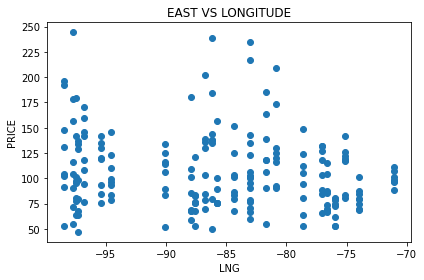

In [22]:
x_values = east["Lng"]
y_values = east["Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("EAST VS LONGITUDE")
plt.xlabel("LNG")
plt.ylabel("PRICE")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("EAST VS LONGITUDE")
plt.show()



The r-squared is: nan


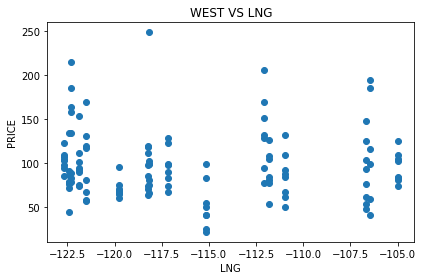

In [23]:
x_values = west["Lng"]
y_values = west["Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("WEST VS LNG")
plt.xlabel("LNG")
plt.ylabel("PRICE")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("WEST VS LONGITUDE")
plt.show()